# 의문점 : 넷플릭스는 왜 이렇게 옛날 거 밖에 없을까? 요즘 애들은 그런 걸 좋아하나?

In [241]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# netflix data 불러오기

In [48]:
csv_path = os.getenv("HOME") + "/aiffel/hackerthon/data/netflix_titles.csv"
data = pd.read_csv(csv_path)
data_copy=data.copy()
df = pd.DataFrame(data)

In [56]:
# 날짜 숫자로 바꿔주기
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

# netflix 주가&거래량 데이터 불러오기

In [ ]:
csv_path = os.getenv("HOME") + "/aiffel/hackerthon/data/netflix_stockprice.csv"
data2 = pd.read_csv(csv_path)
data2_copy=data2.copy()
df2 = pd.DataFrame(data2)
df2.head()


In [53]:
df2['Date'] = pd.to_datetime(df2['Date'])
# 해줘야 됨

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4881 non-null   datetime64[ns]
 1   High       4881 non-null   float64       
 2   Low        4881 non-null   float64       
 3   Open       4881 non-null   float64       
 4   Close      4881 non-null   float64       
 5   Volume     4881 non-null   float64       
 6   Adj Close  4881 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 267.1 KB


# dtype 맞춰 주고 데이터 합치기

In [58]:
df_titles_stockprice = pd.merge(df, df2, left_on='date_added', right_on='Date', how='inner')
df_titles_stockprice.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,High,Low,Open,Close,Volume,Adj Close
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,592.97998,583.640015,592.5,592.390015,2126200.0,592.390015
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,592.97998,583.640015,592.5,592.390015,2126200.0,592.390015
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,592.97998,583.640015,592.5,592.390015,2126200.0,592.390015
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,592.97998,583.640015,592.5,592.390015,2126200.0,592.390015
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,592.97998,583.640015,592.5,592.390015,2126200.0,592.390015


In [25]:
len(df_titles_stockprice)

6795

In [26]:
print(df.columns)
print(df2.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


<AxesSubplot:xlabel='date_added', ylabel='release_year'>

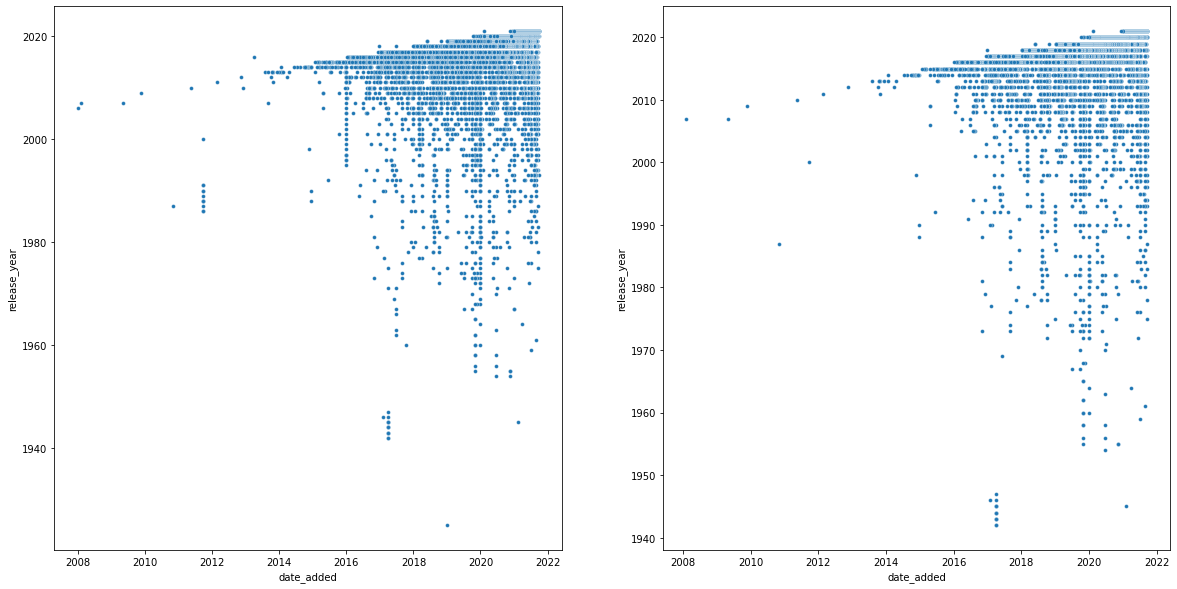

In [220]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.scatterplot(x='date_added', y='release_year', data=df, s=15)

plt.subplot(1,2,2)
sns.scatterplot(x='date_added', y='release_year', data=df_titles_stockprice, s=15)

#주가와 상관관계 (16년, 19년, 20년)
#합친 후 16년 복고 컨텐츠 쭈루룩 추가한 거 생략됨

--> 최신 컨텐츠 항상 확보하려는 경향, 점점 복고 컨텐츠 추가하는 경향

<AxesSubplot:xlabel='date_added', ylabel='release_year'>

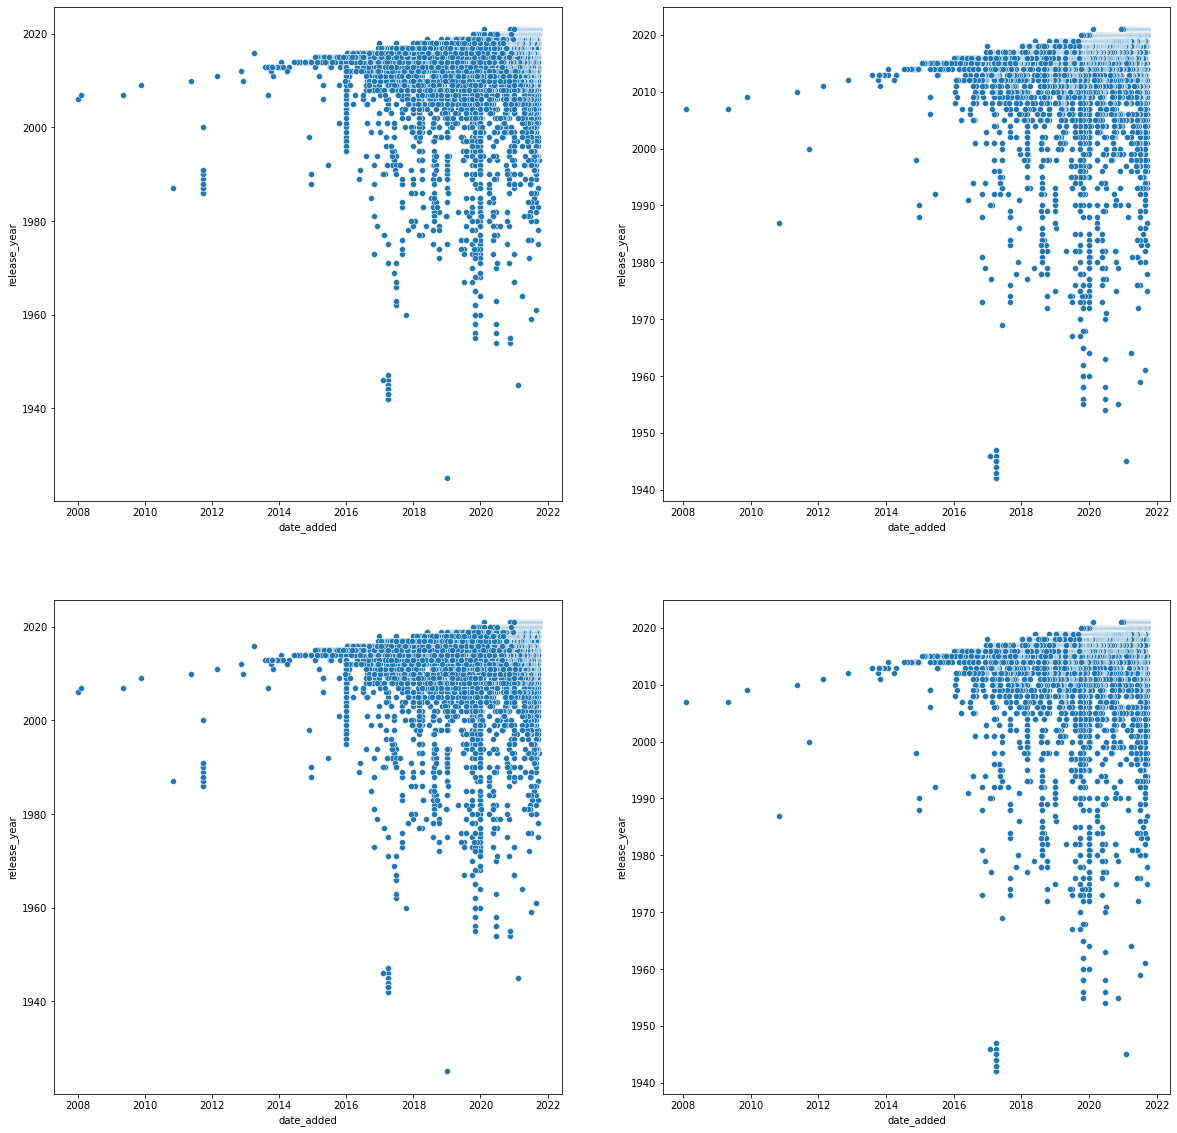

In [150]:
#subplot(row, column, index)

plt.figure(figsize = (20, 20))

plt.subplot(2,2,1)
sns.scatterplot(x='date_added', y='release_year', data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='date_added', y='release_year', data=df_titles_stockprice)

plt.subplot(2,2,3)
sns.scatterplot(x='date_added', y='release_year', data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='date_added', y='release_year', data=df_titles_stockprice)


#주가와 상관관계 (16년, 19년, 20년)
#합친 후 16년 복고 컨텐츠 쭈루룩 추가한 거 생략됨

--> 처음에는 최신물만 취급하다가 점점 복고 컨텐츠로 확장


그래프 한번에 여러개 그리기 (여러 축)
https://pbj0812.tistory.com/451


# 추가된 컨텐츠 발매연도 - 주가 관계

Text(0, 0.5, 'Stock Price')

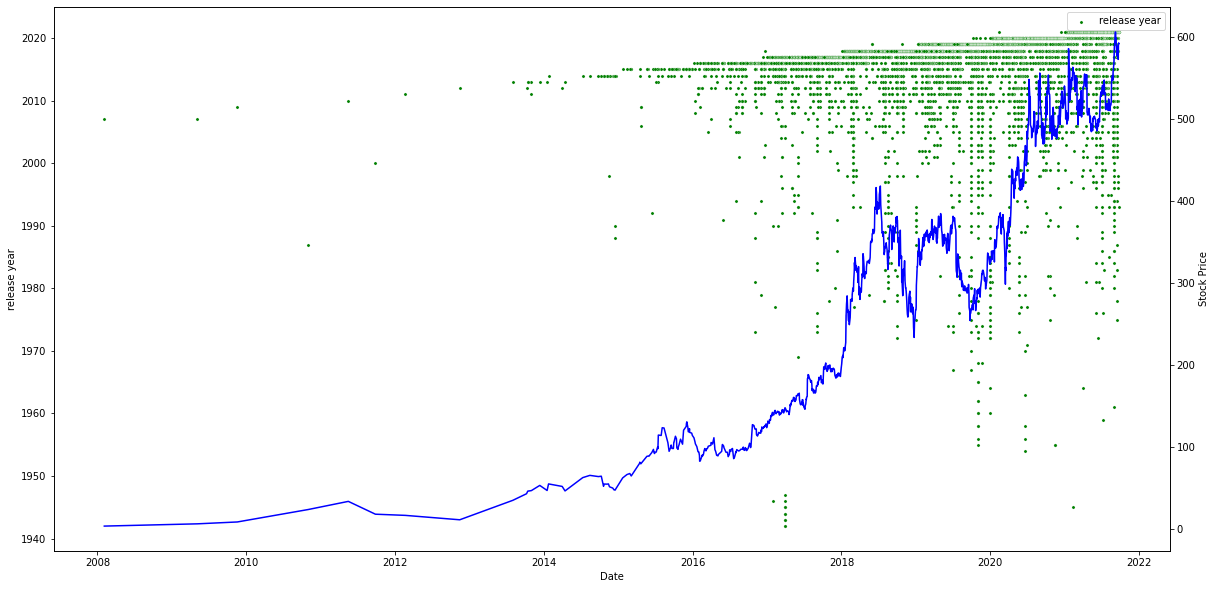

In [101]:
fig, axe1 = plt.subplots(figsize = (20, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_stockprice, x = 'Date', y = 'release_year', color = 'g', s=10)
c2 = sns.lineplot(ax = axe2, data = df_titles_stockprice, x = 'Date', y = 'Adj Close', color = 'b')

axe1.legend(['release year','Stock Price'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('release year')
axe2.set_ylabel('Stock Price')

--> 복고 컨텐츠 밀도가 높은 구간에서 주가가 급상승, 밀도가 낮은 구간에서 조정 (최신 컨텐츠를 추구하는 한국 문화와 반대)


# type별 주가 추이

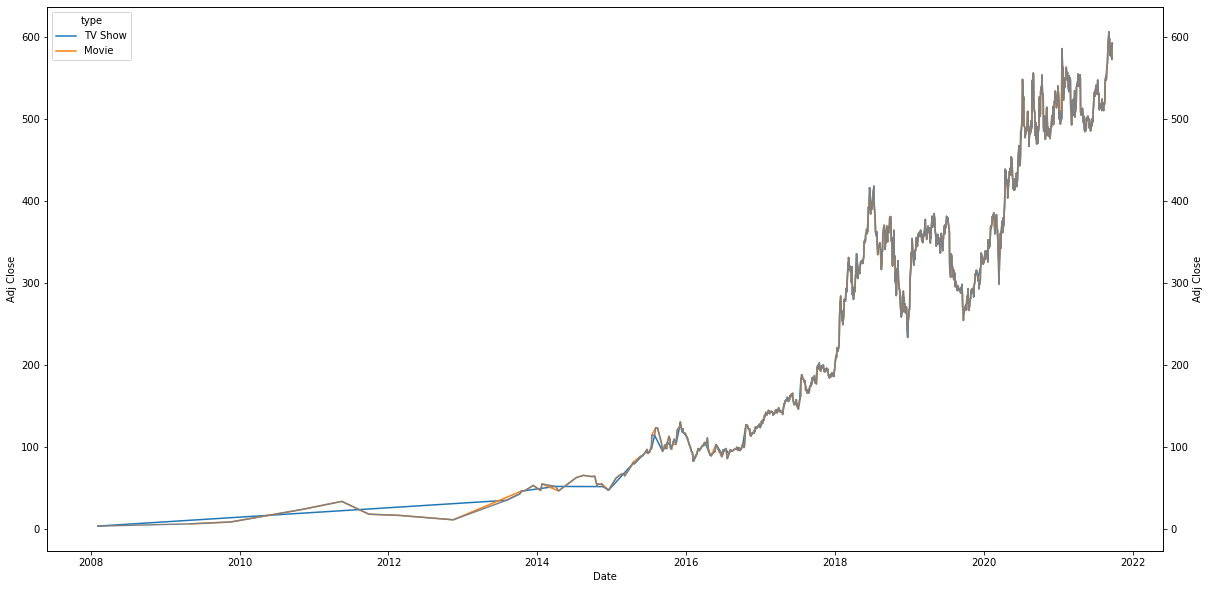

In [100]:
fig, axe1 = plt.subplots(figsize = (20, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx()

c1 = sns.lineplot(ax = axe1, data = df_titles_stockprice, x = 'Date', y = 'Adj Close', hue='type')
c2 = sns.lineplot(ax = axe2, data = df_titles_stockprice, x = 'Date', y = 'Adj Close', color = 'gray')


--> 대체로 Movie에 따라감, 초반 빼고는 별 차이가 없음



--> 안 찍힘? 발매연도 대신 평점, 주제(description sentiment 분석)와의 관계도 봐야함 + 거래량 대신 실적과도 + 디즈니 등 다른 곳 영화들도 (복고 등) + 평 좋은 영화 감독/배우 몇명 집어서 주가.거래량.실적과 비교(흥행보증수표)

S&P 500 등 평균그래프도

실제 뉴스, 리포트와 비교(전략, 성공요인 맞는지) + 그래프 미화

넷플릭스 : 양은 많은데 질이 떨어진다
디즈니 : 질은 좋은데 양이 없다

# 평점 데이터 합친 netflix_titles + netflix_imdb 불러오기

In [49]:
csv_path = os.getenv("HOME") + "/aiffel/hackerthon/data/netfilx_titles_rating.csv"
data3 = pd.read_csv(csv_path)
data3_copy=data3.copy()
df3 = pd.DataFrame(data3)
df3.head()


,Unnamed: 0,show_id,type,title,director_x,cast,country_x,date_added,release_year,rating,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,...,3.0,25.0,2.7,13.0,3.3,29.0,2.6,190.0,2.1,125.0
1,1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,...,7.7,52.0,8.3,42.0,3.8,20.0,7.3,259.0,5.8,105.0
2,2,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,...,6.6,2437.0,6.3,505.0,5.0,214.0,6.2,6506.0,6.0,8096.0
3,3,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,...,8.7,3.0,NaN,NaN,5.0,4.0,6.4,16.0,5.5,78.0
4,4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,...,6.0,224.0,5.5,96.0,5.5,23.0,5.6,383.0,6.3,1584.0


In [51]:
df3['date_added'] = pd.to_datetime(df3['date_added'])
df3.head()

,Unnamed: 0,show_id,type,title,director_x,cast,country_x,date_added,release_year,rating,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,...,3.0,25.0,2.7,13.0,3.3,29.0,2.6,190.0,2.1,125.0
1,1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,...,7.7,52.0,8.3,42.0,3.8,20.0,7.3,259.0,5.8,105.0
2,2,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,...,6.6,2437.0,6.3,505.0,5.0,214.0,6.2,6506.0,6.0,8096.0
3,3,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,...,8.7,3.0,NaN,NaN,5.0,4.0,6.4,16.0,5.5,78.0
4,4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,...,6.0,224.0,5.5,96.0,5.5,23.0,5.6,383.0,6.3,1584.0


In [61]:
# 원본 + 주가 데이터에 평점 데이터까지 합치기
df_titles_rating_stockprice = pd.merge(df3, df2, left_on='date_added', right_on='Date', how='inner')
df_titles_rating_stockprice.head()

,Unnamed: 0,show_id,type,title,director_x,cast,country_x,date_added,release_year,rating,...,us_voters_votes,non_us_voters_rating,non_us_voters_votes,Date,High,Low,Open,Close,Volume,Adj Close
0,0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,...,190.0,2.1,125.0,2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
1,1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,...,259.0,5.8,105.0,2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
2,2,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,...,6506.0,6.0,8096.0,2021-09-22,595.650024,579.690002,579.690002,590.650024,4021800.0,590.650024
3,3,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,...,16.0,5.5,78.0,2021-09-22,595.650024,579.690002,579.690002,590.650024,4021800.0,590.650024
4,4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,...,383.0,6.3,1584.0,2021-09-21,581.880005,569.369995,578.309998,573.140015,2250900.0,573.140015


In [62]:
df_titles_rating_stockprice.columns


Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director_x', 'cast',
       'country_x', 'date_added', 'release_year', 'rating', 'duration_x',
       'listed_in', 'description_x', 'imdb_title_id', 'original_title', 'year',
       'date_published', 'genre', 'duration_y', 'country_y', 'language',
       'director_y', 'writer', 'production_company', 'actors', 'description_y',
       'avg_vote', 'votes', 'budget', 'usa_gross_income',
       'worlwide_gross_income', 'metascore', 'reviews_from_users',
       'reviews_from_critics', 'weighted_average_vote', 'total_votes',
       'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7',
       'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_v

# S&P500 지수 대비 Netfilx의 초과 상승 기간 파악

In [85]:
csv_path = os.getenv("HOME") + "/aiffel/hackerthon/data/SP_500.csv"
data4 = pd.read_csv(csv_path)
data4_copy=data4.copy()
df4 = pd.DataFrame(data4)
df4.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
19680,2021-09-13,4474.81,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
19681,2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
19682,2021-09-15,4447.49,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
19683,2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
19684,2021-09-17,4469.74,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


In [92]:
# df4 형식 datetime64로 맞춰주기 
df4['Date'] = pd.to_datetime(df4['Date'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 19685 non-null  datetime64[ns]
 1   Open                 19685 non-null  float64       
 2   High                 19685 non-null  float64       
 3   Low                  19685 non-null  float64       
 4   Close                19685 non-null  float64       
 5   Adj Close            19685 non-null  float64       
 6   Volume               19685 non-null  int64         
 7   % Gain/Loss (Close)  19685 non-null  float64       
 8   % Price Variation    19685 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.4 MB


In [122]:
# 원본 + 주가 + 평점 데이터에 S&P500 데이터까지 합치기 -> 겹치는 column명은 _x, _y로 라벨링됨
df_titles_rating_stockprice_SP500 = pd.merge(df_titles_rating_stockprice, df4, left_on='date_added', right_on='Date', how='inner')
len(df_titles_rating_stockprice_SP500)

2173

In [97]:
len(df_titles_rating_stockprice_SP500)

2173

Text(0, 0.5, 'Adj Close_y')

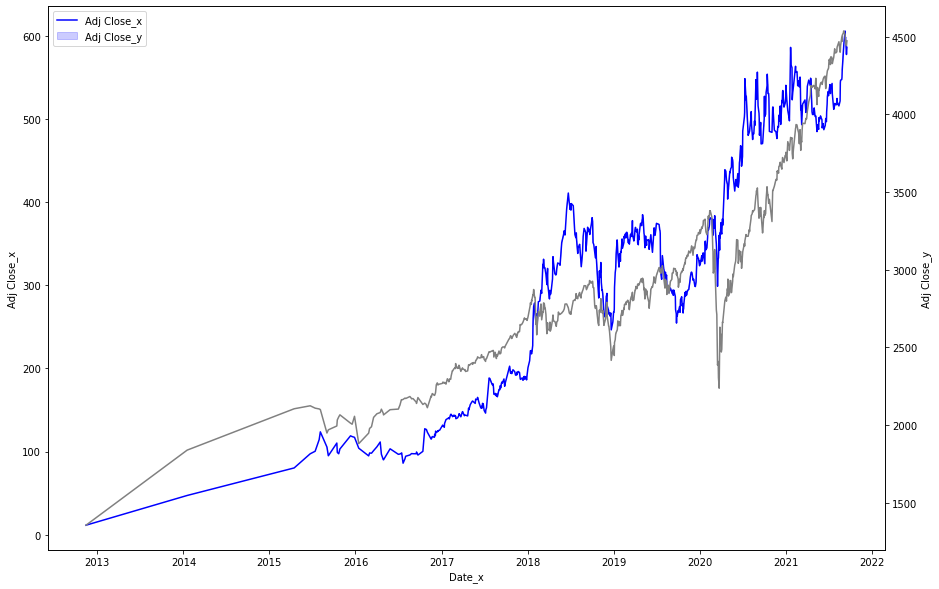

In [120]:
fig, axe2 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨, 숫자 바꿔주기
axe3 = axe2.twinx() # 숫자 바꿔주기

c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')

axe2.legend(['Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


--> 2018초, 2019초, 2020초에 Netflix가 S&P500 대비 초과상승

19년 말에 S&P500은 오르는데 netflix 주가는 떨어지는 교차 부분 존재 : 디즈니+ 등 경쟁자 등장 


# 개봉연도 - 주가(S&P500포함)

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

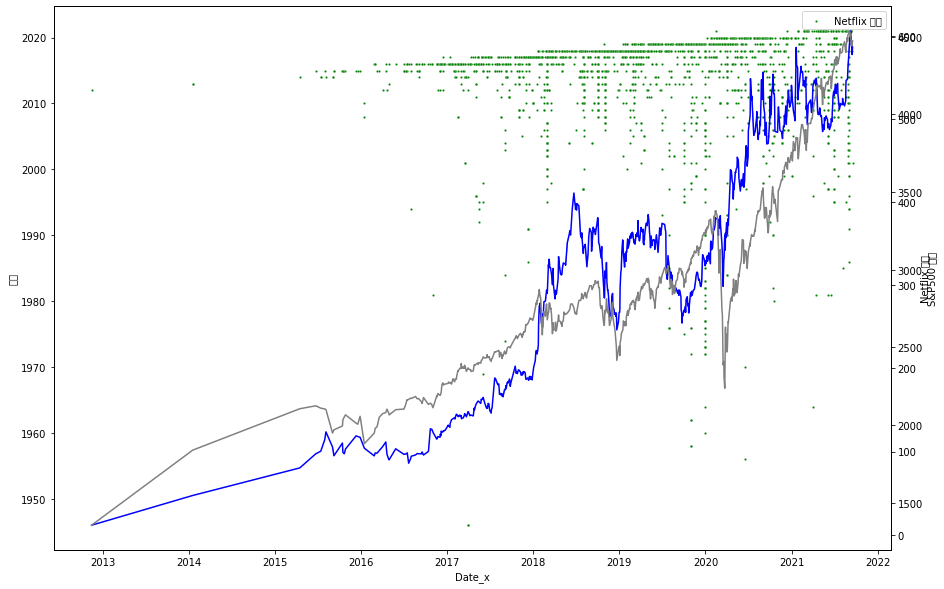

In [238]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'release_year', color = 'g', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['개봉연도', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

# 평점 - 주가 관계

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

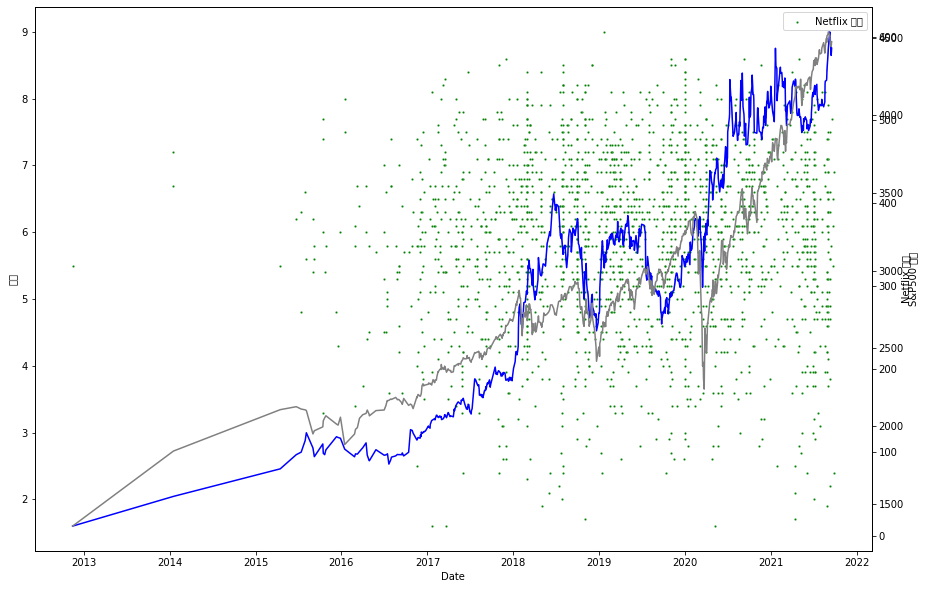

In [124]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice, x = 'Date', y = 'weighted_average_vote', color = 'g', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')



--> 전체 평점 : 위, 아래 적고 중간 값이 많다 

1. 4~8점 사이 중간대 점수를 주는 사람
3. 나머지 사람
순으로 많다

19년 중반 교차 부분에서는 부정적 평가가 다소 늘어난다

상관관계 찾기 어렵다... 주가와 가장 상관관계 있는 성별/연령대별 평점은?


# 연령대별 평점 특징


<AxesSubplot:xlabel='Date_x', ylabel='allgenders_0age_avg_vote'>

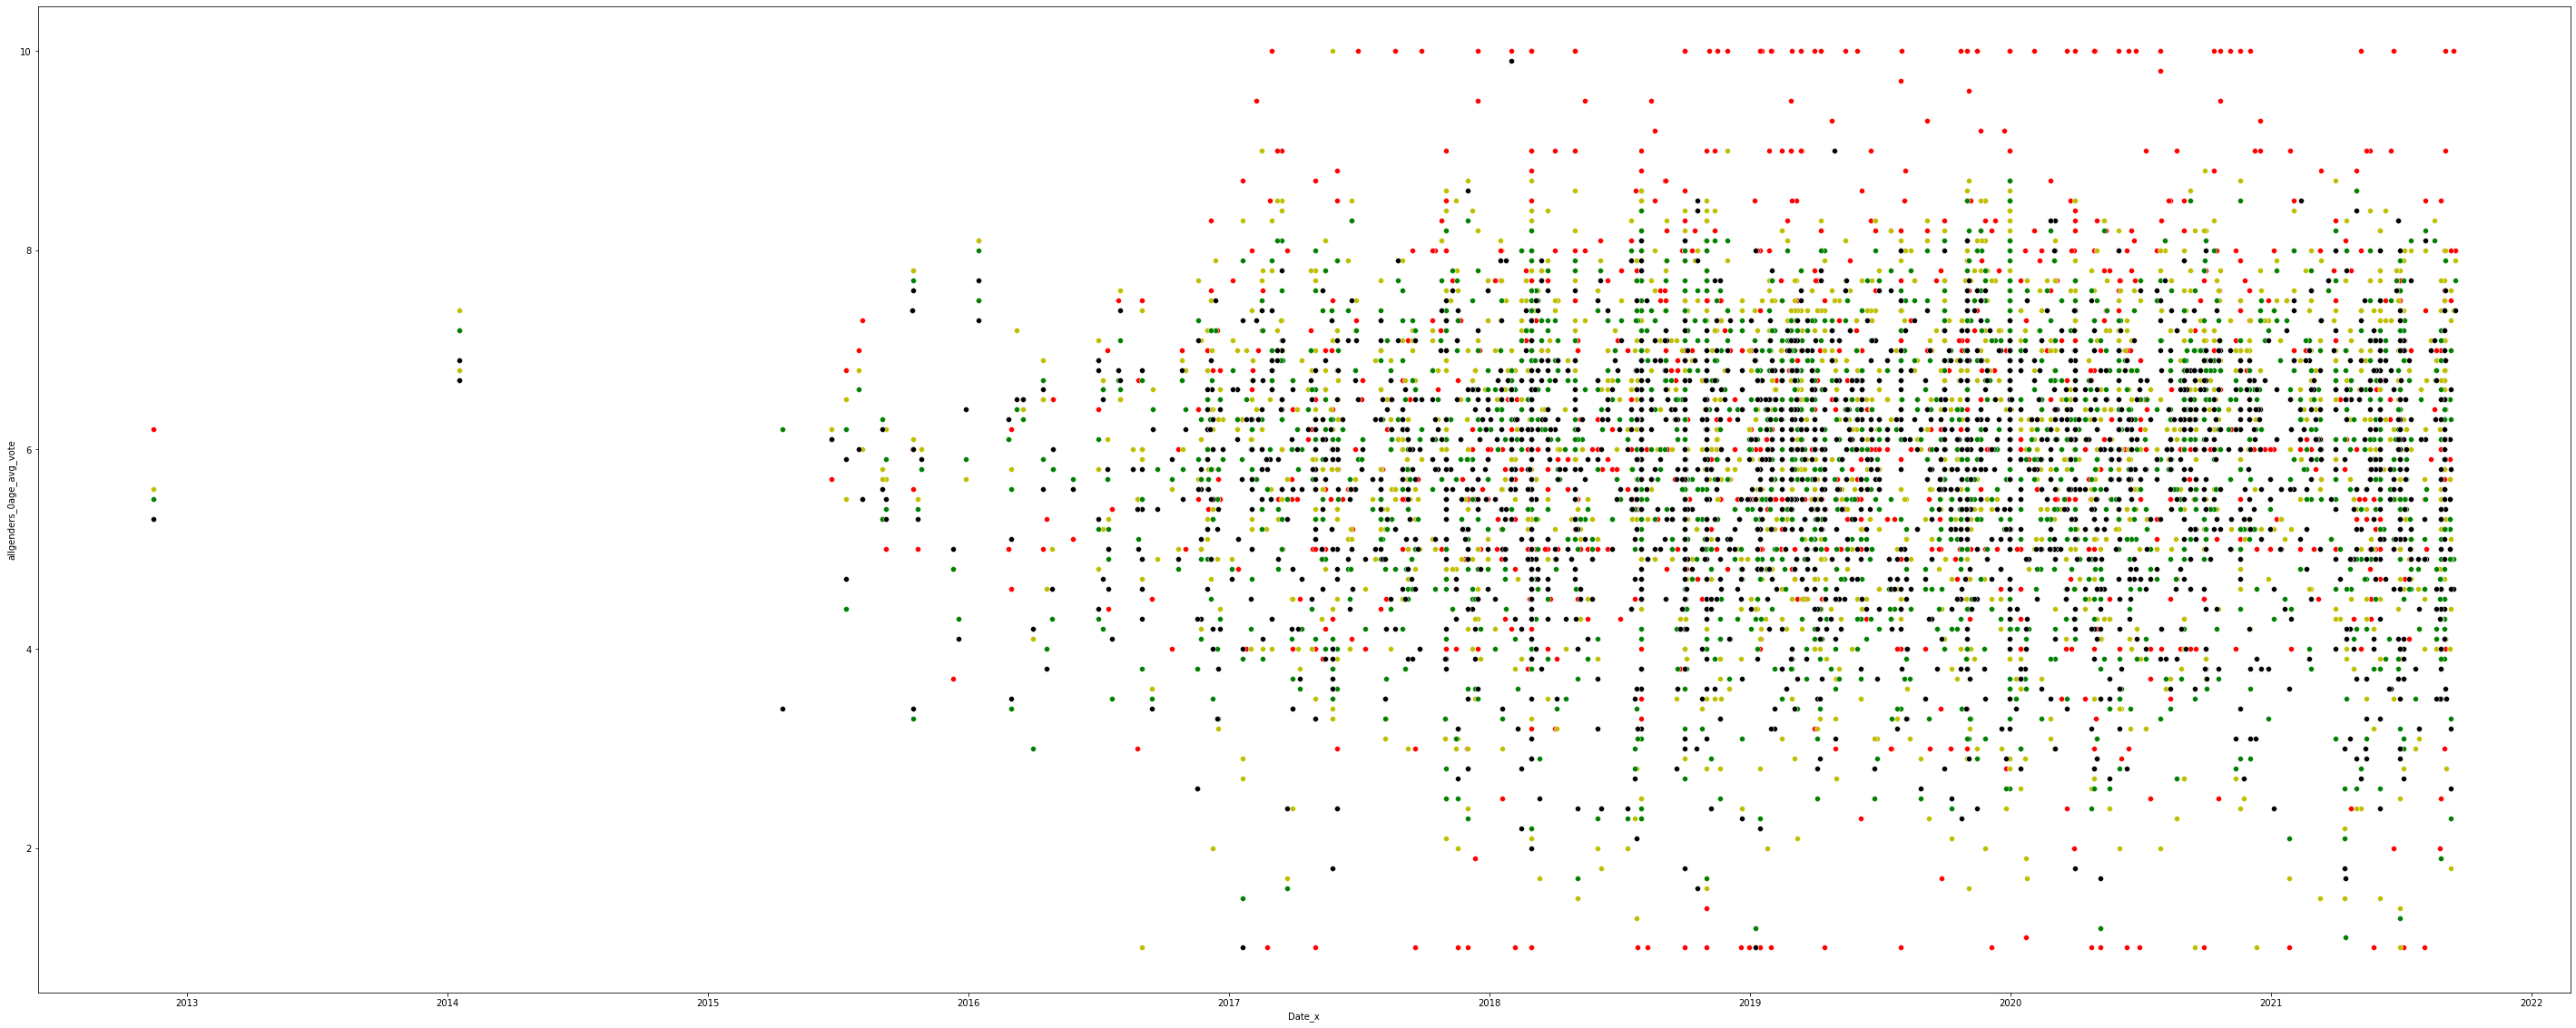

In [161]:
plt.figure(figsize = (50, 20))
sns.scatterplot(x='Date_x', y='allgenders_0age_avg_vote', data=df_titles_rating_stockprice_SP500, color='r')
sns.scatterplot(x='Date_x', y='allgenders_18age_avg_vote', data=df_titles_rating_stockprice_SP500, color='y')
sns.scatterplot(x='Date_x', y='allgenders_30age_avg_vote', data=df_titles_rating_stockprice_SP500, color='g')
sns.scatterplot(x='Date_x', y='allgenders_45age_avg_vote', data=df_titles_rating_stockprice_SP500, color='k')

빨강 --> 18세 미만 청소년층은 고르게 분포되며 1점, 10점 평점을 많이 준다 (취향이 뚜렷하다, 대체로 긍정적이지만 극단적임)

노랑 --> 18-30세 청년층은 평점이 청소년에 비해서 약간 좁아지되 극단적 긍부정은 없고 대체로 5-8점에 분포하지만 10대에 비해 비판(2~4점)도 어느 정도 한다 (대체로 긍정적이고 비판도 함) 

초록 --> 30-45세 중년층은 평점이 대체로 4~8점 중간 쪽에 좁아져 분포되어 있다 (다수를 따르는 취향, 대체로 무난)

검정 --> 45세 이상 장년층은 중년층과 비슷하지만 영화를 많이 보며 뻔하다고 느껴서인지 아래 쪽으로 다소 쏠려 있다 (냉철하다, 대체로 부정적)


# 개봉연도 - 연령대별 평점 


<AxesSubplot:xlabel='release_year', ylabel='allgenders_30age_avg_vote'>

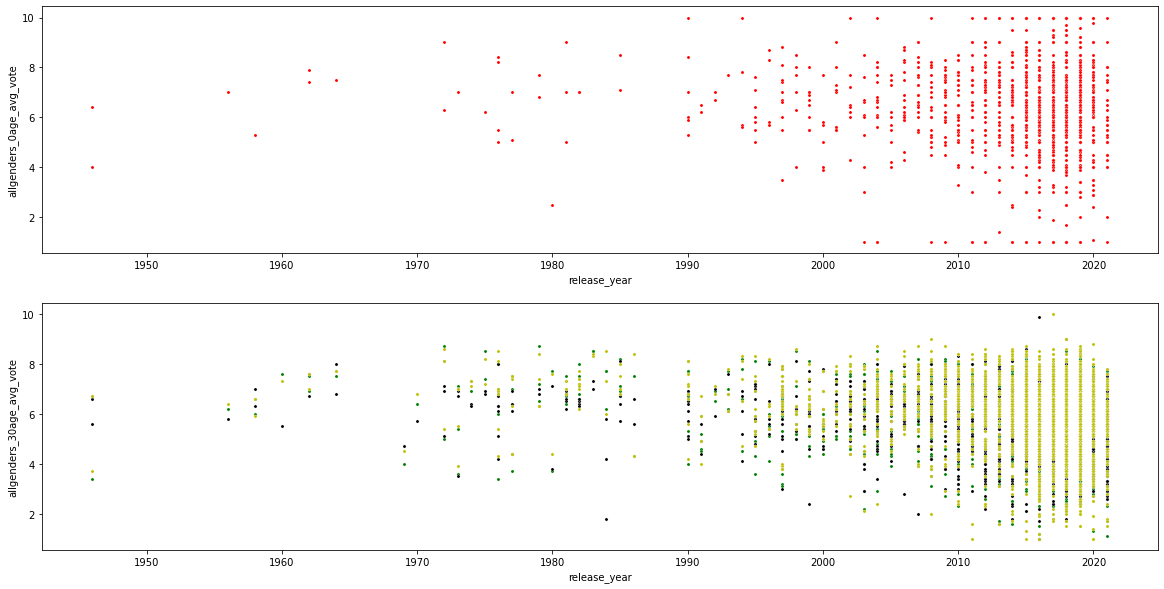

In [240]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
sns.scatterplot(x='release_year', y='allgenders_0age_avg_vote', data=df_titles_rating_stockprice_SP500, color='r', s=10)

plt.subplot(2,1,2)
sns.scatterplot(x='release_year', y='allgenders_30age_avg_vote', data=df_titles_rating_stockprice_SP500, color='g', s=10)
sns.scatterplot(x='release_year', y='allgenders_45age_avg_vote', data=df_titles_rating_stockprice_SP500, color='k', s=10)
sns.scatterplot(x='release_year', y='allgenders_18age_avg_vote', data=df_titles_rating_stockprice_SP500, color='y', s=10)



--> 청소년층은 그나마 최신 컨텐츠에 10점을 주기도 하지만, 모든 층에서 복고 컨텐츠에 중~중상의 평점을 부여한다. 다만 특히 부정적 평가는 청,중,장년층에서 최신 컨텐츠에 쏠려 있으므로 오히려 복고 컨텐츠가 무난 혹은 좋은 평점을 받는다고 볼 수 있다. 최신 컨텐츠에 비해 검증되고 엄선된 명작 컨텐츠만 추가되어서 그런지는 몰라도 어쨌든 

복고 컨텐츠는 통한다!




# 18세 미만 청소년층 평점 - 주가

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

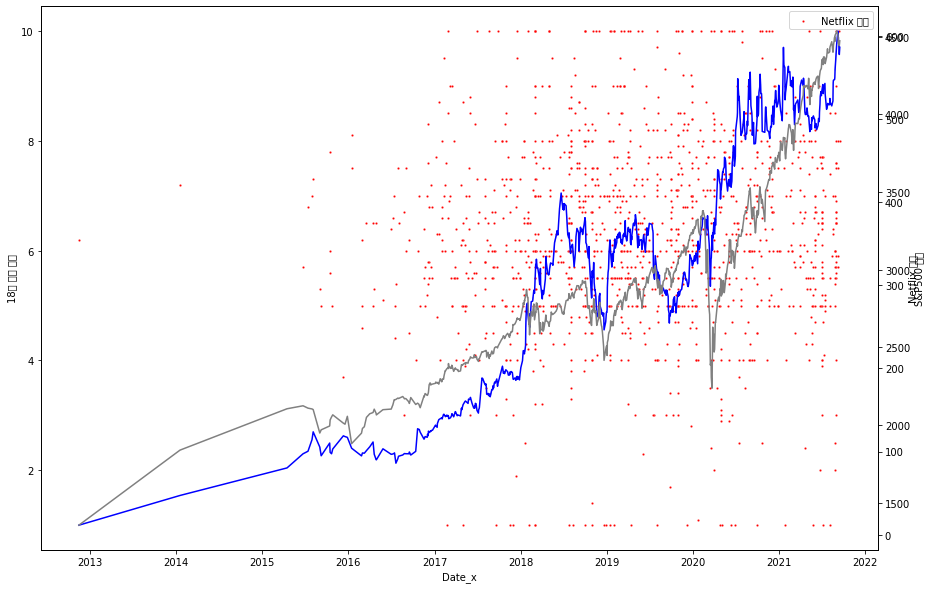

In [162]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_0age_avg_vote', color = 'r', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['청소년층 평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('청소년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


--> 18세 미만 평점 : 
1. 5~8점 사이 괜찮은 점수를 주는 사람
2. 1점, 10점 극단적 점수를 주는 사람
3. 8~10점 사이 후한 점수를 주는 사람
4. 1~5점 사이 박한 점수를 주는 사람
순으로 많다

--> 10점 평점 작품의 등장, 밀도가 높은 구간에 주가 상승, 밀도가 낮은 구간에서 주가 하락이 보여진다 (트렌드에 민감한 세대)



# 18-30세 청년층 평점 - 주가

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

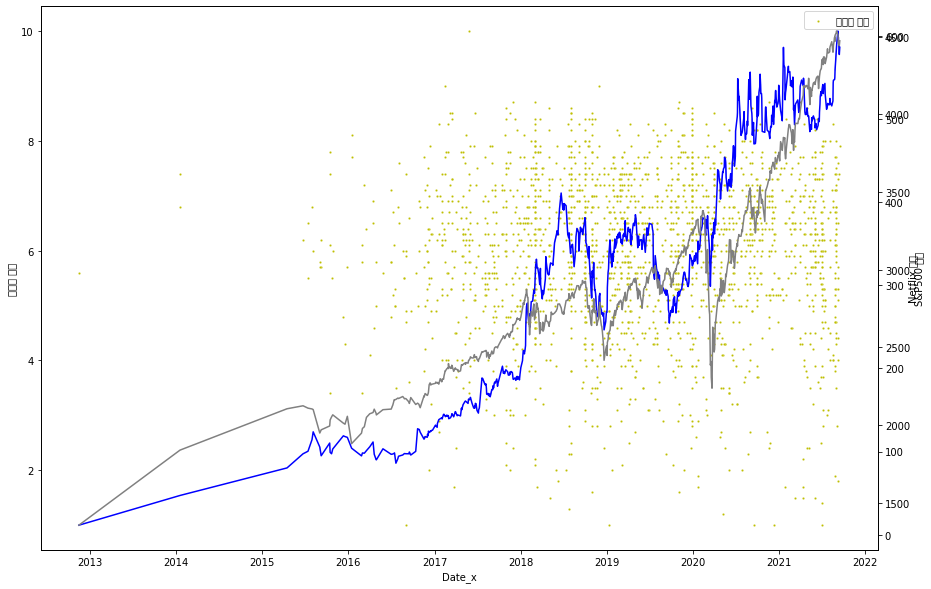

In [239]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_18age_avg_vote', color = 'y', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['청년층 평점','Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('청년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')


--> 대체로 부정적(2~4점) 평가가 많은 시기에 주가 조정/횡보기, 부정적 평가가 적은 시기가 주가 상승기와 겹친다


# 30-45세 중년층 평점 - 주가

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

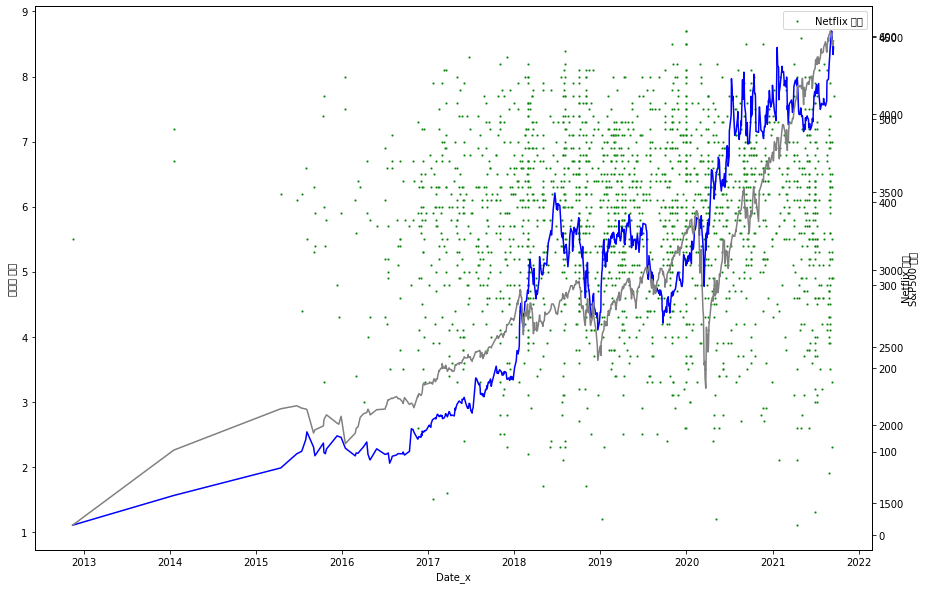

In [165]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_30age_avg_vote', color = 'g', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend(['Netflix 주가','S&P500 지수', '중년층 평점'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('중년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

--> 관련성 찾기 어려워짐 (트렌드보다는 소신껏 평점을 매긴다)


# 45세 이상 장년층 평점 - 주가 

Text(0, 0.5, 'S&P500 지수')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

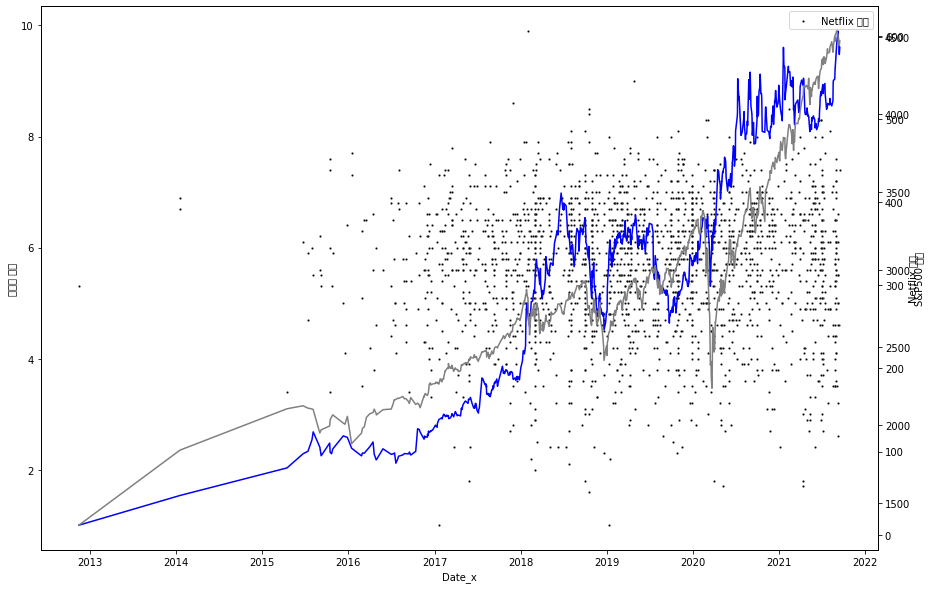

In [167]:
fig, axe1 = plt.subplots(figsize = (15, 10)) # figsize 안에 넣어야 적용됨
axe2 = axe1.twinx() # scatterplot axe3을 적어줘야 함
axe3 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'allgenders_45age_avg_vote', color = 'k', s=5)
c2 = sns.lineplot(ax = axe2, data = df_titles_rating_stockprice_SP500, x = 'Date_x', y = 'Adj Close_x', color = 'b')
c3 = sns.lineplot(ax = axe3, data = df_titles_rating_stockprice_SP500, x = 'Date_y', y = 'Adj Close_y', color = 'gray')


axe1.legend([ '장년층 평점', 'Netflix 주가','S&P500 지수'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('장년층 평점')
axe2.set_ylabel('Netflix 주가')
axe3.set_ylabel('S&P500 지수')

--> 관련성 거의 없어짐 (넷플릭스가 잘 나갈 때도 못 나갈 때도 냉철하다, 평점 분포가 시기에 따라 별 차이가 없다, 어른들은 다 비슷하다)

# 디즈니 플러스 vs 넷플릭스 - 복고 컨텐츠 전략 비교

In [169]:
csv_path = os.getenv("HOME") + "/aiffel/hackerthon/data/disneyplus_titles.csv"
data5 = pd.read_csv(csv_path)
data5_copy=data5.copy()
df5 = pd.DataFrame(data5)
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [175]:
df5['date_added'] = pd.to_datetime(df5['date_added'])
df5.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [184]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [203]:
prac = df.copy()
prac.sort_values(by='date_added', ascending=True, inplace=True)
prac.reset_index(drop=True, inplace=True) #drop은 새로운 index컬럼 안 생기게, inplace는 원본 수정o
prac[prac['date_added'] > '2019-10-01']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4819,s6361,TV Show,Border Patrol,NaN,Timothy Balme,NaN,2019-10-02,2016,TV-PG,1 Season,Reality TV,This reality TV series follows the men and wom...
4820,s3461,Movie,Salam - The First ****** Nobel Laureate,Anand Kamalakar,NaN,United States,2019-10-02,2018,TV-PG,76 min,Documentaries,"Shunned by his country due to religion, Abdus ..."
4821,s6619,TV Show,Diva Brides,NaN,NaN,NaN,2019-10-02,2017,TV-MA,1 Season,"British TV Shows, Reality TV","In this reality series, brides-to-be stop at n..."
4822,s7298,TV Show,License to Drill: Louisiana,NaN,NaN,Canada,2019-10-02,2014,TV-PG,1 Season,Reality TV,A crew of oil riggers work an off-season job a...
4823,s7216,TV Show,Kitten Rescuers,NaN,Jo Brand,United Kingdom,2019-10-02,2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...",Cat-crazy host Jo Brand follows vets and anima...
...,...,...,...,...,...,...,...,...,...,...,...,...
8792,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
8793,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8794,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
8795,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [204]:
prac = prac.iloc[4819:] #자르기
prac.reset_index(drop=True, inplace=True)
prac

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s6361,TV Show,Border Patrol,NaN,Timothy Balme,NaN,2019-10-02,2016,TV-PG,1 Season,Reality TV,This reality TV series follows the men and wom...
1,s3461,Movie,Salam - The First ****** Nobel Laureate,Anand Kamalakar,NaN,United States,2019-10-02,2018,TV-PG,76 min,Documentaries,"Shunned by his country due to religion, Abdus ..."
2,s6619,TV Show,Diva Brides,NaN,NaN,NaN,2019-10-02,2017,TV-MA,1 Season,"British TV Shows, Reality TV","In this reality series, brides-to-be stop at n..."
3,s7298,TV Show,License to Drill: Louisiana,NaN,NaN,Canada,2019-10-02,2014,TV-PG,1 Season,Reality TV,A crew of oil riggers work an off-season job a...
4,s7216,TV Show,Kitten Rescuers,NaN,Jo Brand,United Kingdom,2019-10-02,2017,TV-14,1 Season,"British TV Shows, International TV Shows, Real...",Cat-crazy host Jo Brand follows vets and anima...
...,...,...,...,...,...,...,...,...,...,...,...,...
3983,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3984,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3985,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
3986,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<AxesSubplot:xlabel='date_added', ylabel='release_year'>

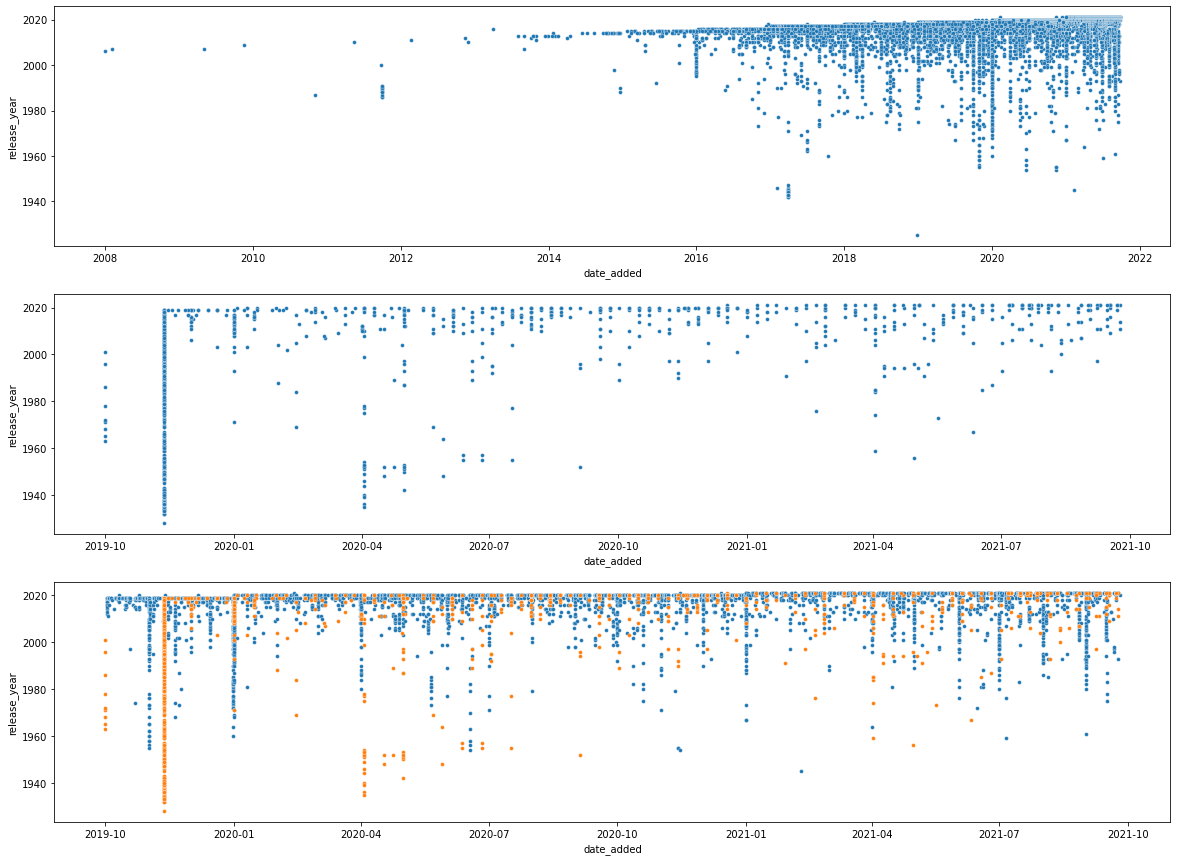

In [211]:
# 컨텐츠 추가일 - 컨텐츠 개봉연도 관계

plt.figure(figsize = (20, 15))

plt.subplot(3,1,1)
sns.scatterplot(x='date_added', y='release_year', data=df, s=15)
# 넷플릭스 2008~2021 

plt.subplot(3,1,2)
sns.scatterplot(x='date_added', y='release_year', data=df5, s=15)
# 디즈니플러스 2019.10~2021

plt.subplot(3,1,3)
sns.scatterplot(x='date_added', y='release_year', data=prac, s=15)
plt.subplot(3,1,3)
sns.scatterplot(x='date_added', y='release_year', data=df5, s=15)
# 넷플릭스+디즈니플러스 2019.10~2021

--> 

넷플릭스는 대체로 컨텐츠 수가 많고 복고 컨텐츠까지 풍부하게 추가한다

디즈니플러스는 처음에 많은 수의 고품질 기존 컨텐츠를 등록했지만 신규 컨텐츠는 적다

복고 컨텐츠 전략을 확인하기에는 디즈니+가 2019년부터여서 데이터가 너무 적다